<a href="https://colab.research.google.com/github/atarisafari/CAP4630-AI/blob/master/hw2/Hw2Problem1_Ethan_Finlay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Single Dense Layer Neural Network With Handcrafted Features
####  For MNIST digit classificiation 
Ethan Finlay

#Initializing Data

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt


mnist = tf.keras.datasets.mnist
# Grabbing images and labels for the training and testing
(training_images_initial, training_labels_initial), (test_images_initial, test_labels_initial) = mnist.load_data()
# Reshaping the image data to be represented as vectors rather than matrices
training_images = training_images_initial.reshape((60000, 28 * 28))
test_images = test_images_initial.reshape((10000, 28 * 28))
# Modifying data to be represented from a 0 to 1 scale
training_images = training_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


# Handcrafted Features

Extracting height and width from training set


In [0]:
# Extracting dimensions of the input images
(image_count, row_size, col_size) = training_images_initial.shape

# Grab the indexes of the first non-zero pixels in each image
(image_index, pos_cols, pos_rows) = np.where(training_images_initial > 0)

print(np.where(training_images_initial > 0))


training_heights = np.array([])
training_widths = np.array([])
offset = image_index[1:]
offset = np.append(offset, image_index[0])
last = np.where(image_index != offset)[0]
offset = image_index[-1]
offset = np.append(offset, image_index[:-1])
first = np.where(image_index != offset)[0]

# By subtracting the first and last "black" pixel vertically we can get our height
training_heights = abs(pos_cols[last] - pos_cols[first]) + 1
# Similarly, by doing so with first and last black pixel horizontally we get the width
training_widths = abs(pos_rows[last] - pos_rows[first]) + 1

#Re-shape vectors to be be compatible for concatenation with the dataset
training_heights = training_heights.reshape(image_count, 1)
training_widths = training_widths.reshape(image_count, 1)

training_heights = training_heights.astype('float32') / col_size
training_widths = training_widths.astype('float32') / row_size

(array([    0,     0,     0, ..., 59999, 59999, 59999]), array([ 5,  5,  5, ..., 24, 24, 24]), array([12, 13, 14, ...,  8,  9, 10]))
Vector Shape:
(60000, 1)
Max height value
[0.71428573]
Min height value
[0.32142857]
Max width value
[0.71428573]
Min width value
[0.03571429]


Extracting height and width for test image set

In [0]:
# Extracting dimensions of the input images
(image_count, row_size, col_size) = test_images_initial.shape

# Grab the indexes of the first non-zero pixels in each image
(image_index, pos_cols, pos_rows) = np.where(test_images_initial > 0)

test_heights = np.array([])
test_widths = np.array([])
offset = image_index[1:]
offset = np.append(offset, image_index[0])
last = np.where(image_index != offset)[0]

offset = image_index[-1]
offset = np.append(offset, image_index[:-1])
first = np.where(image_index != offset)[0]

# By subtracting the first and last "black" pixel vertically we can get our height
test_heights = abs(pos_cols[last] - pos_cols[first]) + 1
# Similarly, by doing so with first and last black pixel horizontally we get the width
test_widths = abs(pos_rows[last] - pos_rows[first]) + 1

#Re-shape vectors to be be compatible for concatenation with the dataset
test_heights = test_heights.reshape(image_count, 1)
test_widths = test_widths.reshape(image_count, 1)

test_heights = test_heights.astype('float32') / col_size
test_widths = test_widths.astype('float32') / row_size

Vector Shape:
(10000, 1)
Max height value
[0.71428573]
Min height value
[0.35714287]
Max width value
[0.71428573]
Min width value
[0.03571429]


#Introducing Handcrafted Feature to the Data

Training Dataset

In [0]:
# add the 2 new features
training_images = np.concatenate((training_images, training_heights), axis = 1)
training_images = np.concatenate((training_images, training_widths), axis = 1)

print('Size of training image dataset is now', end = '')
print(training_images.shape)

Size of training image dataset is now(60000, 786)


Test Dataset

In [0]:
# add the 2 new features
test_images = np.concatenate((test_images, test_heights), axis = 1)
test_images = np.concatenate((test_images, test_widths), axis = 1)

print('Size of test image dataset is now', end = '')
print(test_images.shape)

Size of test image dataset is now(10000, 786)


# Creating the Model


In [0]:
from keras.utils import to_categorical

training_labels = to_categorical(training_labels_initial)
test_labels = to_categorical(test_labels_initial)

model = models.Sequential()

# Here we have a hidden layer with reLu(x) = max(0, x)
model.add(layers.Dense(512, activation = tf.nn.relu, input_shape = (28 * 28 + 2,)))
# For the output layer, we're using softmax with 10 neurons
model.add(layers.Dense(10, activation= tf.nn.softmax))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               402944    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 408,074
Trainable params: 408,074
Non-trainable params: 0
_________________________________________________________________


# Training our Model

In [0]:
# Compiling the model
model.compile( optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Storing training history
hist = model.fit(training_images,
                 training_labels,
                 epochs = 10,
                 batch_size=128,
                 validation_data=(test_images, test_labels))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 6s 106us/step - loss: 0.2671 - acc: 0.9222 - val_loss: 0.1337 - val_acc: 0.9610
Epoch 2/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.1114 - acc: 0.9670 - val_loss: 0.0948 - val_acc: 0.9704
Epoch 3/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0738 - acc: 0.9777 - val_loss: 0.0744 - val_acc: 0.9779
Epoch 4/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0540 - acc: 0.9835 - val_loss: 0.0708 - val_acc: 0.9787
Epoch 5/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0421 - acc: 0.9869 - val_loss: 0.0636 - val_acc: 0.9800
Epoch 6/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0328 - acc: 0.9900 - val_loss: 0.0770 - val_acc: 0.9780
Epoch 7/10
60000/60000 

# Visualizing Results

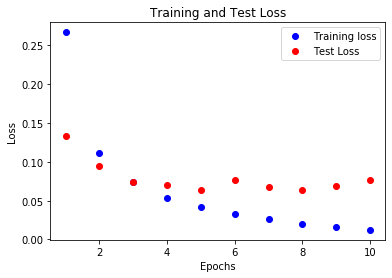

In [0]:
hist_dict = hist.history

training_loss_vals = hist_dict['loss']
testing_loss_vals = hist_dict['val_loss']
epoch_range = range(1, 11)

plt.plot(epoch_range, training_loss_vals, 'bo', label='Training loss')
plt.plot(epoch_range, testing_loss_vals, 'ro', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

# Accuracy Analysis

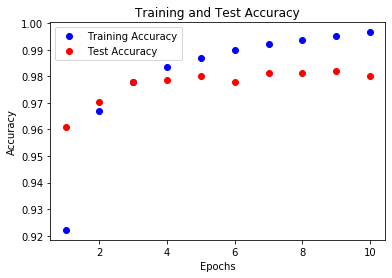

In [0]:
accurate_vals = hist_dict['acc']
test_accurate_vals = hist_dict['val_acc']

plt.plot(epoch_range, accurate_vals, 'bo', label='Training Accuracy')
plt.plot(epoch_range, test_accurate_vals, 'ro', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()